# Capstone Project - Car Accident Severity (Week 2 & 3)

###  Data Science Specialization Capstone Project offered by IBM on Coursera


## Table of Contents

* [Introduction: Business Problem](#introduction)
* [Data](#data)

## Introduction: Business Problem <a name="introduction"></a>

Between **2016 & 2019**, there have been **23731** police recorded injuries due to road traffic collision in **11 districts** in Northern Ireland. Each record indicates how severe the outcome of the collision is. 

The severity of these outcomes ranges from **1(Fatal injury collision)** to **3(Slight injury collision)**; with **2(Serious injury collision)**  being the middle value.

During this time period (2016 to 2019), **Belfast City** had the highest number of recorded incidents with **5872** cases, and the district of **Armagh City**, **Banbridge & Craigavon** having the second-highest number of recorded incidents with **2329** cases. 

The dataset we have will be useful to the police of Northern Ireland, however, we want to explore and create a prediction model for Belfast City. 

We believe the outcome of this exercise will be very useful to the **Belfast City Council** in designing and constructing new roads or modifying existing roads when considering variables like speed limits, one way, the position of traffic lights etc

## Data <a name="data"></a>

The entire dataset that includes all **11** districts has **23731** entries as mentioned earlier. Records from 2016 to 2019 were joined together to create a <a href="https://app.box.com/s/yqr1w8rjlro77ieckqcwmfub8bdcpja0">richer data set</a>.

However, the following **9** fields have either **20902** or **20903** missing values.

    a_jdet            20902
    a_jcont           20902
    a_pedhum          20903
    a_pedphys         20903
    a_light           20902
    a_weat            20902
    a_roadsc          20902
    a_speccs          20902
    a_chaz            20902
    a_scene           20902

**The name of these fields will be changed to something easier to read in the next section**
    
We won’t be dropping the missing data because of the sheer amount. Replacing these empty fields or data by the **frequency(mode)** of the categorical data in each of these columns will be the approach used. 

Please view the data guide document  <a href="https://app.box.com/s/x734lsyrb4jkavxqtoxjvmkoqyg5odpo">data guide document</a> for a description of each of the aforementioned fields.

Dropping all rows with missing data shows that the target variable **'a_type'** for collision severity will be unbalanced. Please view the <a href="https://app.box.com/s/x734lsyrb4jkavxqtoxjvmkoqyg5odpo">data guide document</a>  for a description of the **'a_type'** field.

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
print('Hello Capstone Project Course')

Hello Capstone Project Course



### 1. This data set was published with an Open Government Licence on  the data.gov.uk website and its titled "Police Recorded Injury Road Traffic Collision Statistics Northern Ireland 2016"

### The dataset for 2017, 2018, and 2019 have been added to this data set to make it richer for analysis

In [9]:
filename = "/home/tunde/Documents/COURSERA-DATA-SCIENCE-SPECIALIZATION/4_APPLIED_DATA_SCIENCE_CAPSTONE/Data_Set/Police_Record/collision2016_to_2019.csv"


In [10]:
df = pd.read_csv(filename, index_col=0)


In [11]:
df.head()

,a_ref,a_District,a_type,a_veh,a_cas,a_wkday,a_day,a_month,a_hour,a_min,...,a_jdet,a_jcont,a_pedhum,a_pedphys,a_light,a_weat,a_roadsc,a_speccs,a_chaz,a_scene
a_year,,,,,,,,,,,,,,,,,,,,,
2016,1,NEMD,3,1,1,FRI,1,1,1,49,...,,,,,,,,,,
2016,2,DCST,3,2,1,FRI,1,1,3,19,...,,,,,,,,,,
2016,3,ARND,2,1,1,FRI,1,1,3,35,...,1,1,1,1,6,2,4,1,1,1
2016,4,BELC,3,2,2,FRI,1,1,3,50,...,,,,,,,,,,
2016,5,BELC,3,2,1,FRI,1,1,15,4,...,,,,,,,,,,


##### Change the column header names to something more readable 

In [14]:
New_Column_Headers = {'a_year':'Year', 'a_ref':'Reference_No', 'a_District':'District', 'a_type':'Collision_Severity', 'a_veh':'Number_of_Vehicles', 'a_cas':'Number_of_Casualities', 'a_wkday':'Weekday_of_Collision', 'a_day':'Week_of_Collision', 'a_month':'Month_of_Collision', 'a_hour':'Hour_of_Collision', 'a_min':'Minute_of-Collision', 'a_gd1':'Location_Easting', 'a_gd2':'Location_Northing', 'a_ctype':'Carriageway_Type', 'a_speed':'Speed_Limit', 'a_jdet':'Junction_Detail', 'a_jcont':'Junction-Control', 'a_pedhum':'Pedestrian_Crossing_Human_Control', 'a_pedphys':'Pedestrian_Crossing_Physical_Control', 'a_light':'Light_Conditions', 'a_weat':'Weather_Conditions', 'a_roadsc':'Road_Surface_Conditions', 'a_speccs':'Special_Conditions_at_Site', 'a_chaz':'Carriageway_Harzard', 'a_scene':'Police_at_Scene'}
new_df = df.rename(columns=New_Column_Headers)
new_df            

,Reference_No,District,Collision_Severity,Number_of_Vehicles,Number_of_Casualities,Weekday_of_Collision,Week_of_Collision,Month_of_Collision,Hour_of_Collision,Minute_of-Collision,...,Junction_Detail,Junction-Control,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Control,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Harzard,Police_at_Scene
a_year,,,,,,,,,,,,,,,,,,,,,
2016,1,NEMD,3,1,1,FRI,1,1,1,49,...,,,,,,,,,,
2016,2,DCST,3,2,1,FRI,1,1,3,19,...,,,,,,,,,,
2016,3,ARND,2,1,1,FRI,1,1,3,35,...,1,1,1,1,6,2,4,1,1,1
2016,4,BELC,3,2,2,FRI,1,1,3,50,...,,,,,,,,,,
2016,5,BELC,3,2,1,FRI,1,1,15,4,...,,,,,,,,,,
2016,6,DCST,3,2,3,FRI,1,1,15,42,...,,,,,,,,,,
2016,7,BELC,3,2,2,FRI,1,1,16,30,...,,,,,,,,,,
2016,8,BELC,3,2,1,SAT,2,1,0,22,...,,,,,,,,,,
2016,9,BELC,3,2,2,SAT,2,1,8,44,...,,,,,,,,,,


### 2. Checking the number of entries, columns and data types for each colunm for the data set 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23731 entries, 2016 to 2019
Data columns (total 24 columns):
a_ref         23731 non-null int64
a_District    23731 non-null object
a_type        23731 non-null int64
a_veh         23731 non-null int64
a_cas         23731 non-null int64
a_wkday       23731 non-null object
a_day         23731 non-null int64
a_month       23731 non-null int64
a_hour        23731 non-null int64
a_min         23731 non-null int64
a_gd1         23731 non-null int64
a_gd2         23731 non-null int64
a_ctype       23731 non-null int64
a_speed       23731 non-null int64
a_jdet        23731 non-null object
a_jcont       23731 non-null object
a_pedhum      23731 non-null object
a_pedphys     23731 non-null object
a_light       23731 non-null object
a_weat        23731 non-null object
a_roadsc      23731 non-null object
a_speccs      23731 non-null object
a_chaz        23731 non-null object
a_scene       23731 non-null object
dtypes: int64(12), object(12)
memory 

In [6]:
df.describe(include = "all")

,a_ref,a_District,a_type,a_veh,a_cas,a_wkday,a_day,a_month,a_hour,a_min,...,a_jdet,a_jcont,a_pedhum,a_pedphys,a_light,a_weat,a_roadsc,a_speccs,a_chaz,a_scene
count,23731.000000,23731,23731.00000,23731.000000,23731.000000,23731,23731.000000,23731.000000,23731.000000,23731.000000,...,23731,23731,23731,23731,23731,23731,23731,23731,23731,23731
unique,NaN,11,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,...,9,6,4,7,8,11,11,7,7,3
top,NaN,BELC,NaN,NaN,NaN,FRI,NaN,NaN,NaN,NaN,...,,,,,,,,,,
freq,NaN,5872,NaN,NaN,NaN,3931,NaN,NaN,NaN,NaN,...,20902,20902,20903,20903,20902,20902,20902,20902,20902,20902
mean,2971.237917,NaN,2.87097,1.867304,1.532721,NaN,15.652817,6.647929,13.723610,27.327925,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1720.229069,NaN,0.36335,0.652304,1.018194,NaN,8.765668,3.481886,4.989497,17.733712,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,1.00000,1.000000,1.000000,NaN,1.000000,1.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1484.000000,NaN,3.00000,1.000000,1.000000,NaN,8.000000,4.000000,10.000000,12.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2967.000000,NaN,3.00000,2.000000,1.000000,NaN,16.000000,7.000000,14.000000,29.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4450.000000,NaN,3.00000,2.000000,2.000000,NaN,23.000000,10.000000,17.000000,43.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. There are a lot of missing values in the last 10 columns. We can confirm that there are 20903 missing values for these columns. This gives us (23731 - 20903) number of entries ( 2828 entries). We may have to drop these columns later

In [7]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df.isnull().sum(axis=0)


a_ref             0
a_District        0
a_type            0
a_veh             0
a_cas             0
a_wkday           0
a_day             0
a_month           0
a_hour            0
a_min             0
a_gd1             0
a_gd2             0
a_ctype           0
a_speed           0
a_jdet        20902
a_jcont       20902
a_pedhum      20903
a_pedphys     20903
a_light       20902
a_weat        20902
a_roadsc      20902
a_speccs      20902
a_chaz        20902
a_scene       20902
dtype: int64

### 4. We have 11 unique Districts for Northern Ireland as entries in the dataset. Here we can see "BELC" (Belfast City) has the highest number of entries at 5872. We might want to observe the how speed limits "a_speed" affects Collision in the Belfast City district 

In [8]:
df['a_District'].value_counts()

BELC    5872
ARBC    2329
NEMD    2114
LISC    2056
ANTN    1887
DCST    1751
MIDU    1684
ARND    1661
CCGL    1641
MEAN    1414
FERO    1322
Name: a_District, dtype: int64

### 5. There are a lot  of missing values in the data as shown in the output below

In [9]:
df.isnull()

,a_ref,a_District,a_type,a_veh,a_cas,a_wkday,a_day,a_month,a_hour,a_min,...,a_jdet,a_jcont,a_pedhum,a_pedphys,a_light,a_weat,a_roadsc,a_speccs,a_chaz,a_scene
a_year,,,,,,,,,,,,,,,,,,,,,
2016,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2016,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2016,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2016,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2016,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2016,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2016,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2016,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2016,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


### 6. In the output below, we see that after dropping all rows that have "NaN" values, we have 754 entries for our training data. 

In [10]:
new_df = df.dropna()

new_df

,a_ref,a_District,a_type,a_veh,a_cas,a_wkday,a_day,a_month,a_hour,a_min,...,a_jdet,a_jcont,a_pedhum,a_pedphys,a_light,a_weat,a_roadsc,a_speccs,a_chaz,a_scene
a_year,,,,,,,,,,,,,,,,,,,,,
2016,3,ARND,2,1,1,FRI,1,1,3,35,...,1,1,1,1,6,2,4,1,1,1
2016,10,ANTN,2,3,7,SAT,2,1,8,50,...,1,1,1,1,2,2,2,1,1,1
2016,11,ARBC,2,2,2,SAT,2,1,8,51,...,10,7,1,1,1,1,2,1,1,1
2016,29,ANTN,2,1,1,SUN,3,1,18,30,...,3,7,1,1,6,1,2,1,1,1
2016,35,ARND,1,2,2,MON,4,1,14,9,...,12,7,1,1,1,1,2,1,1,1
2016,82,ANTN,2,2,1,WED,6,1,19,49,...,10,7,1,1,6,1,2,1,1,1
2016,85,BELC,2,1,3,WED,6,1,23,26,...,1,1,1,1,7,2,2,1,1,1
2016,100,NEMD,2,2,2,FRI,8,1,8,10,...,6,4,1,1,2,9,2,1,1,1
2016,108,ARBC,2,2,3,FRI,8,1,12,30,...,12,7,1,1,2,1,2,1,1,1


### 7. The number of entries per district has reduced drastically

In [11]:
new_df['a_District'].value_counts()

BELC    463
ARBC    331
NEMD    324
CCGL    249
MIDU    233
LISC    219
ANTN    217
FERO    212
ARND    209
MEAN    194
DCST    177
Name: a_District, dtype: int64

In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2828 entries, 2016 to 2019
Data columns (total 24 columns):
a_ref         2828 non-null int64
a_District    2828 non-null object
a_type        2828 non-null int64
a_veh         2828 non-null int64
a_cas         2828 non-null int64
a_wkday       2828 non-null object
a_day         2828 non-null int64
a_month       2828 non-null int64
a_hour        2828 non-null int64
a_min         2828 non-null int64
a_gd1         2828 non-null int64
a_gd2         2828 non-null int64
a_ctype       2828 non-null int64
a_speed       2828 non-null int64
a_jdet        2828 non-null object
a_jcont       2828 non-null object
a_pedhum      2828 non-null object
a_pedphys     2828 non-null object
a_light       2828 non-null object
a_weat        2828 non-null object
a_roadsc      2828 non-null object
a_speccs      2828 non-null object
a_chaz        2828 non-null object
a_scene       2828 non-null object
dtypes: int64(12), object(12)
memory usage: 552.3+ KB


### 8. Describing the data 

In [13]:
new_df.describe(include = "all")

,a_ref,a_District,a_type,a_veh,a_cas,a_wkday,a_day,a_month,a_hour,a_min,...,a_jdet,a_jcont,a_pedhum,a_pedphys,a_light,a_weat,a_roadsc,a_speccs,a_chaz,a_scene
count,2828.000000,2828,2828.000000,2828.000000,2828.000000,2828,2828.000000,2828.000000,2828.000000,2828.000000,...,2828,2828,2828,2828,2828,2828,2828,2828,2828,2828
unique,NaN,11,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,...,8,5,3,6,7,10,10,6,6,2
top,NaN,BELC,NaN,NaN,NaN,SAT,NaN,NaN,NaN,NaN,...,1,1,1,1,2,1,1,1,1,1
freq,NaN,463,NaN,NaN,NaN,463,NaN,NaN,NaN,NaN,...,1343,1343,2799,2470,904,1954,1806,2777,2761,2574
mean,2966.537129,NaN,1.917610,1.665134,1.729491,NaN,15.679279,6.639321,13.619165,27.424682,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1691.323308,NaN,0.275007,0.739956,1.261952,NaN,8.768212,3.422295,5.740800,17.759436,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1548.000000,NaN,2.000000,1.000000,1.000000,NaN,8.000000,4.000000,10.000000,12.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2966.500000,NaN,2.000000,2.000000,1.000000,NaN,16.000000,7.000000,15.000000,28.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4366.500000,NaN,2.000000,2.000000,2.000000,NaN,23.000000,10.000000,18.000000,43.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 9.  checking how balanced the data is

### I won't be dropping the data. Instead, I will replacing measing values with mode values. As  you can see, dropping all missing values will remove all incidents that resulted in "slight injury(3)" from the dataset

In [14]:
new_df['a_type'].value_counts()

2    2595
1     233
Name: a_type, dtype: int64

In [15]:
df['a_type'].value_counts()

3    20902
2     2596
1      233
Name: a_type, dtype: int64

### 10. A quick look at what the dataset for Belfast City would look like

In [16]:
#df.cats[df.cats=='a']
bel_df = df[df.a_District == 'BELC']
bel_df


,a_ref,a_District,a_type,a_veh,a_cas,a_wkday,a_day,a_month,a_hour,a_min,...,a_jdet,a_jcont,a_pedhum,a_pedphys,a_light,a_weat,a_roadsc,a_speccs,a_chaz,a_scene
a_year,,,,,,,,,,,,,,,,,,,,,
2016,4,BELC,3,2,2,FRI,1,1,3,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,5,BELC,3,2,1,FRI,1,1,15,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,7,BELC,3,2,2,FRI,1,1,16,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,8,BELC,3,2,1,SAT,2,1,0,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,9,BELC,3,2,2,SAT,2,1,8,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,12,BELC,3,2,1,SAT,2,1,15,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,13,BELC,3,2,1,SAT,2,1,16,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,17,BELC,3,2,1,SUN,3,1,4,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,18,BELC,3,2,2,SUN,3,1,5,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 11. A quick look at what the description for the dataset of Belfast City 

In [17]:
bel_df.describe(include = "all")

,a_ref,a_District,a_type,a_veh,a_cas,a_wkday,a_day,a_month,a_hour,a_min,...,a_jdet,a_jcont,a_pedhum,a_pedphys,a_light,a_weat,a_roadsc,a_speccs,a_chaz,a_scene
count,5872.000000,5872,5872.000000,5872.000000,5872.000000,5872,5872.000000,5872.000000,5872.000000,5872.000000,...,463,463,463,463,463,463,463,463,463,463
unique,NaN,1,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,...,7,4,3,6,7,8,7,3,4,2
top,NaN,BELC,NaN,NaN,NaN,FRI,NaN,NaN,NaN,NaN,...,12,7,1,1,1,1,1,1,1,1
freq,NaN,5872,NaN,NaN,NaN,1026,NaN,NaN,NaN,NaN,...,211,227,453,298,217,333,339,454,451,384
mean,3005.325783,NaN,2.918767,1.916213,1.493529,NaN,15.534401,6.718324,14.022820,27.181029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1710.782477,NaN,0.281809,0.650299,1.041937,NaN,8.793889,3.464104,4.880185,17.704007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1525.500000,NaN,3.000000,2.000000,1.000000,NaN,8.000000,4.000000,11.000000,12.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3026.500000,NaN,3.000000,2.000000,1.000000,NaN,15.000000,7.000000,15.000000,30.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4476.500000,NaN,3.000000,2.000000,2.000000,NaN,23.000000,10.000000,18.000000,43.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 12. Checking how balanced the dataset for Belfast City is 

### observations for collison severity are still unbalanced

In [18]:
bel_df['a_type'].value_counts()

3    5409
2     449
1      14
Name: a_type, dtype: int64

# 13 Replacing the missing values



All


In [38]:
missing_data_cols = ["a_jdet", "a_jcont", "a_pedhum", "a_pedphys", "a_light", "a_weat", "a_roadsc", "a_speccs", "a_chaz", "a_chaz", "a_scene"]

# function to replace the missing values in colunms with missing values with the mode values 
# and convert the data types in these columns from object data type to int64 data type

def replace_with_mode(dataframe, list_of_columns):
    
    for v in list_of_columns:
        
        mean = 0
        
        mean = pd.to_numeric(dataframe[v].value_counts().idxmax(), errors='coerce')
        
        dataframe[v] = pd.to_numeric(dataframe[v], errors='coerce')
        
        dataframe[v].replace(np.nan,mean,inplace=True)        
        
    return dataframe

test = replace_with_mode(df, missing_data_cols)

print(test.dtypes)

a_ref          int64
a_District    object
a_type         int64
a_veh          int64
a_cas          int64
a_wkday       object
a_day          int64
a_month        int64
a_hour         int64
a_min          int64
a_gd1          int64
a_gd2          int64
a_ctype        int64
a_speed        int64
a_jdet         int64
a_jcont        int64
a_pedhum       int64
a_pedphys      int64
a_light        int64
a_weat         int64
a_roadsc       int64
a_speccs       int64
a_chaz         int64
a_scene        int64
dtype: object


### 14. A quick look at what the dataset for Belfast City would look like again

In [35]:
bel_df = df[df.a_District == 'BELC']
bel_df

,a_ref,a_District,a_type,a_veh,a_cas,a_wkday,a_day,a_month,a_hour,a_min,...,a_jdet,a_jcont,a_pedhum,a_pedphys,a_light,a_weat,a_roadsc,a_speccs,a_chaz,a_scene
a_year,,,,,,,,,,,,,,,,,,,,,
2016,4,BELC,3,2,2,FRI,1,1,3,50,...,1,1,1,1,2,1,1,1,1,1
2016,5,BELC,3,2,1,FRI,1,1,15,4,...,1,1,1,1,2,1,1,1,1,1
2016,7,BELC,3,2,2,FRI,1,1,16,30,...,1,1,1,1,2,1,1,1,1,1
2016,8,BELC,3,2,1,SAT,2,1,0,22,...,1,1,1,1,2,1,1,1,1,1
2016,9,BELC,3,2,2,SAT,2,1,8,44,...,1,1,1,1,2,1,1,1,1,1
2016,12,BELC,3,2,1,SAT,2,1,15,10,...,1,1,1,1,2,1,1,1,1,1
2016,13,BELC,3,2,1,SAT,2,1,16,40,...,1,1,1,1,2,1,1,1,1,1
2016,17,BELC,3,2,1,SUN,3,1,4,12,...,1,1,1,1,2,1,1,1,1,1
2016,18,BELC,3,2,2,SUN,3,1,5,45,...,1,1,1,1,2,1,1,1,1,1


In [23]:
bel_df.isnull().sum(axis=0)

a_ref         0
a_District    0
a_type        0
a_veh         0
a_cas         0
a_wkday       0
a_day         0
a_month       0
a_hour        0
a_min         0
a_gd1         0
a_gd2         0
a_ctype       0
a_speed       0
a_jdet        0
a_jcont       0
a_pedhum      0
a_pedphys     0
a_light       0
a_weat        0
a_roadsc      0
a_speccs      0
a_chaz        0
a_scene       0
dtype: int64

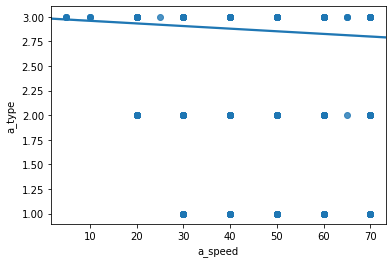

In [40]:
sns.regplot(x='a_speed', y="a_type", data=df)

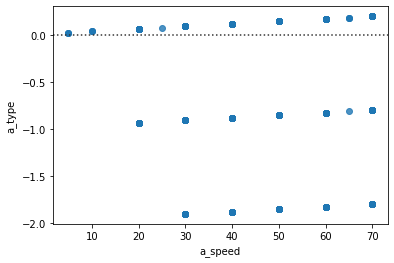

In [41]:
sns.residplot(df['a_speed'], df["a_type"])